In [7]:
import numpy as np
from razor.api import datasources
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datasources('Project Space').abspath()

'/home/aios/projectspace'

In [13]:
all_images = np.load('/home/aios/projectspace/all_images_arr.npz')['images']
all_labels = np.load('/home/aios/projectspace/all_labels_arr.npz')['labels']

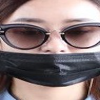

In [11]:
Image.fromarray(all_images[0])

In [ ]:
@rf.block
class DataFeeder:
    __publish__ = True
    __label__ = 'DataFeeder'

    def run(self):
        data: rf.SeriesOutput[t.Any]
            
        all_images = np.load('/home/aios/projectspace/all_images_arr.npz')['images']
        all_labels = np.load('/home/aios/projectspace/all_labels_arr.npz')['labels']
        
        all_labels = all_labels.tolist()
        
        for i in range(len(df)):
            image = all_images[i]
            
            image = image / 255.0
            label = [0, 1] if all_labels[i] == 1 else [1, 0]

            self.data.put({"images": image, "labels": np.array(label)})